In [1]:
### 패키지 설치

import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc #garbage collector

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools #웹 시각화 라이브러리인 d3.js 를 이용하여 보다 interactive 하게 그래프를 만들어주는 모듈.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #TfidVectorizer: Term Frequency-Inverse Document Frequency(단어 빈도- 역문서 빈도)
from sklearn.decomposition import TruncatedSVD #특이값 분해(Singular Value Decomposition, SVD)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import plotly.graph_objs as go

import time
import random


In [2]:
data = pd.read_excel('2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx')
data.columns = ['홍수사상번호', '연', '월', '일', '시간', '유입량', '유역평균강수_1', '강우(A지역)_1', '강우(B지역)_1', '강우(C지역)_1','강우(D지역)_1', '수위(E지역)_1', '수위(D지역)_1',
               '유역평균강수_2', '강우(A지역)_2', '강우(B지역)_2', '강우(C지역)_2','강우(D지역)_2', '수위(E지역)_2', '수위(D지역)_2',
                '유역평균강수_3', '강우(A지역)_3', '강우(B지역)_3', '강우(C지역)_3','강우(D지역)_3', '수위(E지역)_3', '수위(D지역)_3',
                '유역평균강수_4', '강우(A지역)_4', '강우(B지역)_4', '강우(C지역)_4','강우(D지역)_4', '수위(E지역)_4', '수위(D지역)_4',
                '유역평균강수_5', '강우(A지역)_5', '강우(B지역)_5', '강우(C지역)_5','강우(D지역)_5', '수위(E지역)_5', '수위(D지역)_5',
                '유역평균강수_6', '강우(A지역)_6', '강우(B지역)_6', '강우(C지역)_6','강우(D지역)_6', '수위(E지역)_6', '수위(D지역)_6',
               ]

In [3]:
data = data.drop([0])
data = data.astype('float64')

In [4]:
data

,홍수사상번호,연,월,일,시간,유입량,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6
1,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4000,7.0,7.0,7.0,8.0,2.54,122.56875,6.3000,7.0,7.0,7.0,8.0,2.54,122.541667,6.3000,7.0,7.0,7.0,8.0,2.54,122.550000,6.4000,7.0,7.0,8.0,8.0,2.54,122.675000,6.4000,7.0,7.0,8.0,8.0,2.54,122.660,6.4000,7.0,7.0,8.0,8.0,2.54,122.610
2,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3000,7.0,8.0,7.0,8.0,2.53,122.56250,6.4000,7.0,8.0,7.0,8.0,2.53,122.550000,6.4000,7.0,8.0,7.0,8.0,2.53,122.558333,7.3000,7.0,8.0,10.0,10.0,2.53,122.667857,7.3000,7.0,8.0,10.0,10.0,2.53,122.648,7.3000,7.0,8.0,10.0,10.0,2.53,122.600
3,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4000,7.0,9.0,7.0,8.0,2.53,122.55625,7.3000,7.0,9.0,7.0,8.0,2.53,122.558333,7.3000,7.0,9.0,8.0,8.0,2.53,122.566667,8.2000,7.0,9.0,10.0,11.0,2.53,122.660714,8.2000,7.0,9.0,10.0,11.0,2.53,122.636,8.2000,7.0,9.0,10.0,11.0,2.53,122.590
4,1.0,2006.0,7.0,10.0,11.0,302.812199,7.3000,7.0,10.0,7.0,8.0,2.53,122.55625,8.2000,7.0,10.0,8.0,8.0,2.53,122.566667,8.2000,7.0,10.0,10.0,10.0,2.53,122.575000,11.3000,9.0,10.0,15.0,14.0,2.53,122.653571,11.3000,9.0,10.0,15.0,14.0,2.53,122.620,11.3000,9.0,10.0,15.0,14.0,2.53,122.585
5,1.0,2006.0,7.0,10.0,12.0,384.783406,8.2000,7.0,12.0,8.0,10.0,2.53,122.55625,11.3000,9.0,12.0,10.0,10.0,2.53,122.575000,11.3000,9.0,12.0,10.0,11.0,2.53,122.575000,14.4000,12.0,12.0,18.0,16.0,2.53,122.639286,14.4000,12.0,12.0,18.0,16.0,2.53,122.604,14.4000,12.0,12.0,18.0,16.0,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,26.0,2018.0,7.0,7.0,17.0,NaN,2.3689,1.0,0.0,0.0,0.0,3.16,129.99375,2.3689,1.0,0.0,0.0,0.0,3.16,130.016667,2.3689,1.0,0.0,0.0,0.0,3.16,130.025000,2.3689,1.0,0.0,1.0,0.0,3.16,129.882143,2.3689,1.0,0.0,1.0,0.0,3.16,129.916,2.1722,1.0,0.0,0.0,0.0,3.16,129.950
3048,26.0,2018.0,7.0,7.0,18.0,NaN,2.3689,1.0,0.0,0.0,0.0,3.15,130.00625,2.3689,1.0,0.0,0.0,0.0,3.15,130.025000,2.3689,1.0,0.0,0.0,0.0,3.15,130.025000,2.3689,1.0,0.0,1.0,0.0,3.15,129.896429,2.3689,1.0,0.0,1.0,0.0,3.15,129.928,2.0805,1.0,0.0,0.0,0.0,3.15,129.970
3049,26.0,2018.0,7.0,7.0,19.0,NaN,2.3689,1.0,0.0,0.0,0.0,3.13,130.01250,2.3689,1.0,0.0,0.0,0.0,3.13,130.025000,2.3689,1.0,0.0,0.0,0.0,3.13,130.025000,2.3689,1.0,0.0,1.0,0.0,3.13,129.910714,2.3689,1.0,0.0,1.0,0.0,3.13,129.940,2.0354,1.0,0.0,0.0,0.0,3.13,129.980
3050,26.0,2018.0,7.0,7.0,20.0,NaN,2.3689,1.0,0.0,0.0,0.0,3.11,130.01875,2.3689,1.0,0.0,0.0,0.0,3.11,130.025000,2.3689,1.0,0.0,0.0,0.0,3.11,130.025000,2.3689,1.0,0.0,1.0,0.0,3.11,129.925000,2.3488,1.0,0.0,1.0,0.0,3.11,129.952,1.8993,1.0,0.0,0.0,0.0,3.11,129.990


In [5]:
test = data[data.홍수사상번호 ==26]
train = data[data.홍수사상번호 !=26]

In [6]:
train_x = train.drop(['홍수사상번호', '연','월','일','시간', '유입량'], axis = 1)
train_y = train.유입량

test_x = test.drop(['홍수사상번호', '연','월','일','시간'], axis = 1)
test_y = test.iloc[:,0:6]

In [7]:
train_x = train_x - train_x.shift().fillna(0)

In [8]:
train_x

,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6
1,6.4000,7.0,7.0,7.0,8.0,2.54,122.56875,6.3000,7.0,7.0,7.0,8.0,2.54,122.541667,6.3000,7.0,7.0,7.0,8.0,2.54,122.550000,6.4000,7.0,7.0,8.0,8.0,2.54,122.675000,6.4000,7.0,7.0,8.0,8.0,2.54,122.660,6.4000,7.0,7.0,8.0,8.0,2.54,122.610
2,-0.1000,0.0,1.0,0.0,0.0,-0.01,-0.00625,0.1000,0.0,1.0,0.0,0.0,-0.01,0.008333,0.1000,0.0,1.0,0.0,0.0,-0.01,0.008333,0.9000,0.0,1.0,2.0,2.0,-0.01,-0.007143,0.9000,0.0,1.0,2.0,2.0,-0.01,-0.012,0.9000,0.0,1.0,2.0,2.0,-0.01,-0.010
3,0.1000,0.0,1.0,0.0,0.0,0.00,-0.00625,0.9000,0.0,1.0,0.0,0.0,0.00,0.008333,0.9000,0.0,1.0,1.0,0.0,0.00,0.008333,0.9000,0.0,1.0,0.0,1.0,0.00,-0.007143,0.9000,0.0,1.0,0.0,1.0,0.00,-0.012,0.9000,0.0,1.0,0.0,1.0,0.00,-0.010
4,0.9000,0.0,1.0,0.0,0.0,0.00,0.00000,0.9000,0.0,1.0,1.0,0.0,0.00,0.008333,0.9000,0.0,1.0,2.0,2.0,0.00,0.008333,3.1000,2.0,1.0,5.0,3.0,0.00,-0.007143,3.1000,2.0,1.0,5.0,3.0,0.00,-0.016,3.1000,2.0,1.0,5.0,3.0,0.00,-0.005
5,0.9000,0.0,2.0,1.0,2.0,0.00,0.00000,3.1000,2.0,2.0,2.0,2.0,0.00,0.008333,3.1000,2.0,2.0,0.0,1.0,0.00,0.000000,3.1000,3.0,2.0,3.0,2.0,0.00,-0.014286,3.1000,3.0,2.0,3.0,2.0,0.00,-0.016,3.1000,3.0,2.0,3.0,2.0,0.00,-0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,-13.7293,-4.0,0.0,0.0,0.0,-0.02,0.01250,-14.5250,-4.0,0.0,0.0,0.0,-0.02,0.008333,-14.5250,-4.0,0.0,0.0,0.0,-0.02,0.000000,-4.1497,-4.0,0.0,0.0,0.0,-0.02,0.017857,-0.1013,-4.0,0.0,0.0,0.0,-0.02,0.016,-0.0542,-4.0,0.0,0.0,0.0,-0.02,0.015
2888,-14.5250,-4.0,0.0,0.0,0.0,-0.03,0.01250,-4.1497,-4.0,0.0,0.0,0.0,-0.03,0.000000,-4.1497,-4.0,0.0,0.0,0.0,-0.03,0.000000,-0.7235,-4.0,0.0,0.0,0.0,-0.03,0.017857,-0.5327,-4.0,0.0,0.0,0.0,-0.03,0.016,0.0000,-4.0,0.0,0.0,0.0,-0.03,0.015
2889,-4.1497,-1.0,0.0,0.0,0.0,-0.02,0.00625,-0.7235,-1.0,0.0,0.0,0.0,-0.02,0.000000,-0.7235,-1.0,0.0,0.0,0.0,-0.02,0.000000,-0.1013,-1.0,0.0,0.0,0.0,-0.02,0.017857,-0.6372,-1.0,0.0,0.0,0.0,-0.02,0.016,0.0000,-1.0,0.0,0.0,0.0,-0.02,0.010
2890,-0.7235,0.0,0.0,0.0,0.0,-0.02,0.00625,-0.1013,0.0,0.0,0.0,0.0,-0.02,0.000000,-0.1013,0.0,0.0,0.0,0.0,-0.02,0.008333,-0.5327,0.0,0.0,0.0,0.0,-0.02,0.017857,-0.2408,0.0,0.0,0.0,0.0,-0.02,0.016,0.0000,0.0,0.0,0.0,0.0,-0.02,0.010


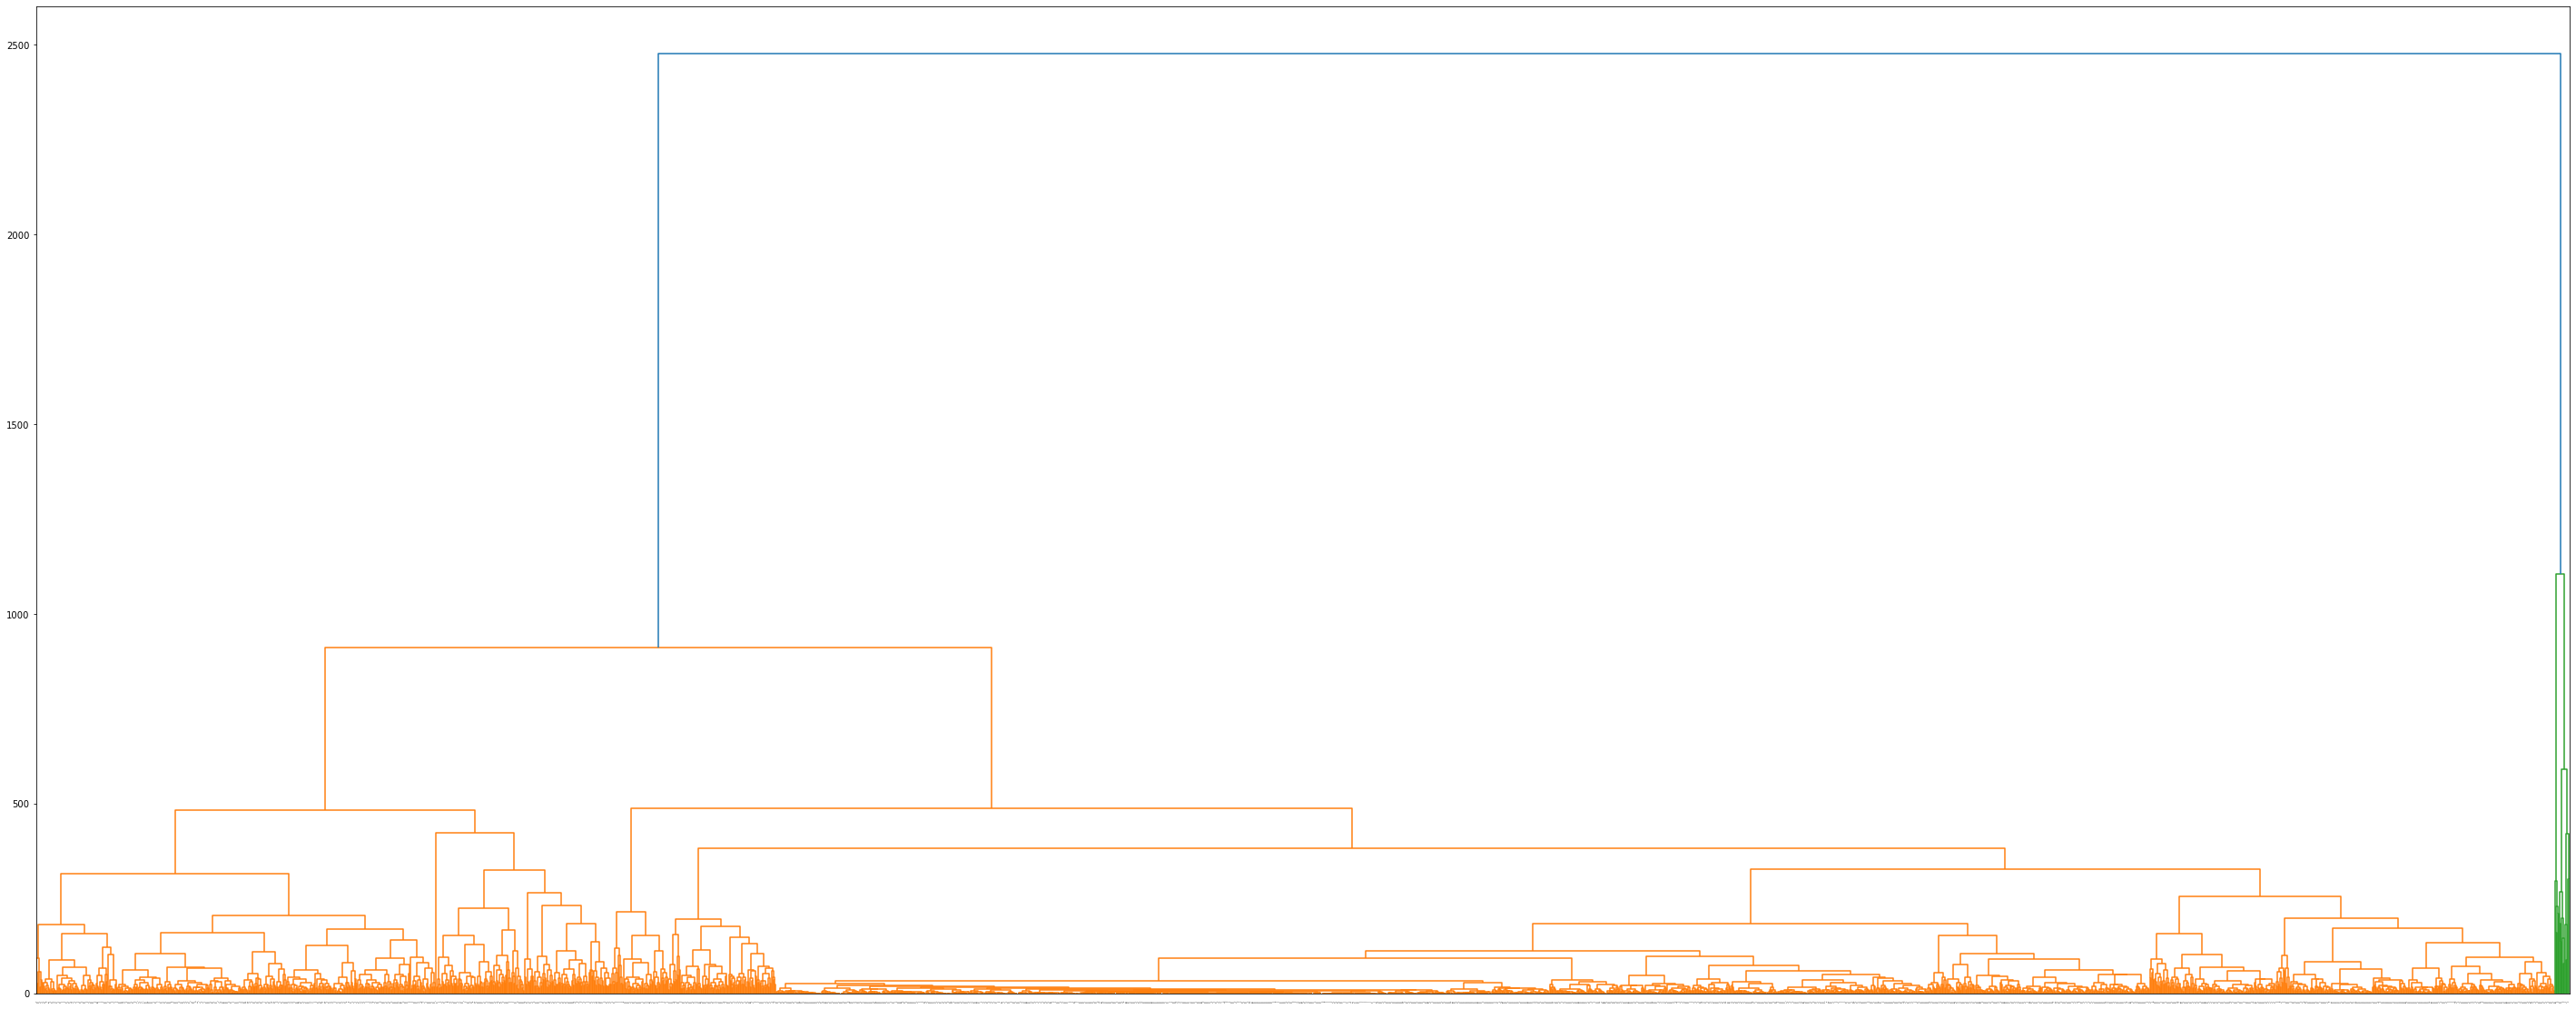

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


feature = train_x

Z = linkage(feature,'ward')

plt.figure(figsize=(50,20))
dendrogram(Z,
           leaf_rotation=100,
           leaf_font_size=1,
)
plt.show()

In [10]:
def scatter_plot(cnt_srs, color, showlegend1=False, name1 = ""):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        name = name1,
        showlegend=showlegend1,
        marker=dict(
            color=color,
        ),
    )
    return trace

[1 2 3]


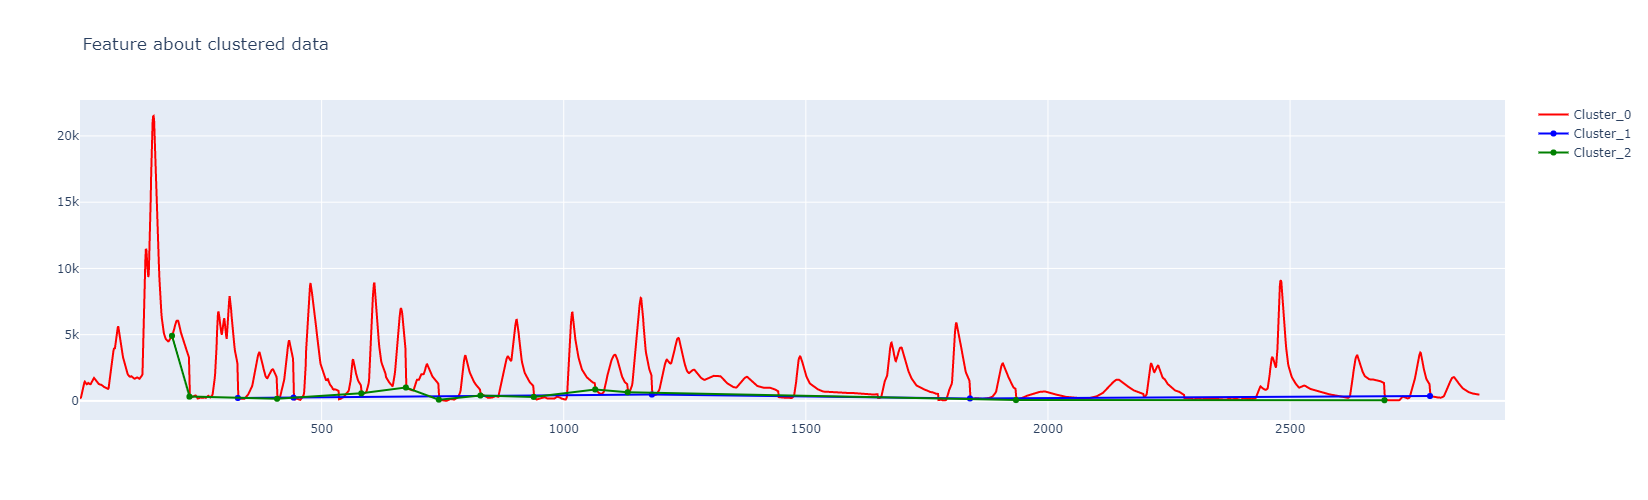

In [43]:
from scipy.cluster.hierarchy import fcluster

k=3
predict=fcluster(Z, k, criterion='maxclust')
print(np.unique(predict))
feature['cluster']=predict
train2 = feature

train2 = pd.concat([train2,train['유입량']], axis=1)

train_0 = train2[train2['cluster'] ==1]
train_1 = train2[train2['cluster']==2]
train_2 = train2[train2['cluster']==3]
#train_3 = train2[train2['cluster']==4]
#train_4 = train1[train1['cluster']==4]

cnt_srs_0 = train_0['유입량']
cnt_srs_1 = train_1['유입량']
cnt_srs_2 = train_2['유입량']
#cnt_srs_3 = train_3['유입량']
#cnt_srs_4 = train_4.groupby('date')['amount'].mean()

trace_0 = scatter_plot(cnt_srs_0, 'red', True ,'Cluster_0')
trace_1 = scatter_plot(cnt_srs_1, 'blue', True ,'Cluster_1')
trace_2 = scatter_plot(cnt_srs_2, 'green', True ,'Cluster_2')
#trace_3 = scatter_plot(cnt_srs_3, 'black', True ,'Cluster_3')
#trace_4 = scatter_plot(cnt_srs_4, 'indigo', True ,'Cluster_4')

layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='Feature about clustered data'
)

data = [trace_0,trace_1,trace_2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Clustering flood")

In [29]:
print(np.shape(train_0))
print(np.shape(train_1))
print(np.shape(train_2))

(2874, 44)
(5, 44)
(12, 44)


In [44]:
train_2

,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6,cluster,유입량
191,1.1000,-67.0,4.0,-10.0,5.0,0.12,-0.10625,2.7000,-71.0,5.0,-4.0,5.0,0.12,-0.100000,2.7000,-71.0,-12.0,-2.0,1.0,0.12,-0.091667,0.4000,-70.0,-12.0,1.0,-13.0,0.12,-0.046428,1.3000,-70.0,-12.0,1.0,-13.0,0.12,-0.068,-6.3000,-70.0,-25.0,-14.0,-9.0,0.12,-0.085,3,4914.125120
227,-103.2000,-121.0,-85.0,-71.0,-78.0,-4.09,-7.19375,-101.2000,-121.0,-83.0,-68.0,-78.0,-4.09,-7.125000,-101.2000,-121.0,-79.0,-67.0,-71.0,-4.09,-7.066667,-99.5000,-121.0,-79.0,-93.0,-63.0,-4.09,-7.235714,-96.6000,-121.0,-79.0,-93.0,-63.0,-4.09,-7.228,-90.9000,-121.0,-79.0,-51.0,-59.0,-4.09,-7.235,3,323.993267
408,-102.4000,-45.0,-58.0,-30.0,-205.0,-3.32,6.58750,-96.1000,-45.0,-58.0,-28.0,-205.0,-3.32,6.391667,-96.1000,-45.0,-51.0,-27.0,-195.0,-3.32,6.300000,-86.2000,-45.0,-51.0,-78.0,-135.0,-3.32,7.025000,-83.1000,-45.0,-51.0,-78.0,-135.0,-3.32,6.884,-72.9000,-45.0,-52.0,-23.0,-77.0,-3.32,6.760,3,161.803002
582,-16.4186,-3.0,-40.0,-74.0,-86.0,-1.23,1.21875,-22.8067,-3.0,-49.0,-60.0,-86.0,-1.23,0.933333,-22.8067,-3.0,-93.0,-54.0,-86.0,-1.23,0.841667,-31.6017,-3.0,-93.0,-54.0,-86.0,-1.23,1.710714,-42.5835,-3.0,-93.0,-54.0,-86.0,-1.23,1.628,-89.7183,-3.0,-86.0,-36.0,-73.0,-1.23,1.510,3,568.923863
674,-96.7389,-86.0,-83.0,-35.0,-85.0,-4.47,2.26250,-96.7389,-86.0,-83.0,-35.0,-85.0,-4.47,1.816667,-96.7389,-86.0,-83.0,-35.0,-85.0,-4.47,1.566667,-96.6635,-86.0,-83.0,-35.0,-85.0,-4.47,2.842857,-96.6825,-86.0,-83.0,-35.0,-85.0,-4.47,2.724,-96.6407,-86.0,-83.0,-34.0,-85.0,-4.47,2.605,3,1011.388849
742,-61.0356,-65.0,-38.0,-21.0,-27.0,-2.78,-4.03750,-57.3257,-65.0,-38.0,-21.0,-27.0,-2.78,-3.991667,-57.3257,-65.0,-37.0,-21.0,-27.0,-2.78,-3.975000,-51.2329,-65.0,-37.0,-21.0,-27.0,-2.78,-4.067857,-45.3151,-65.0,-37.0,-21.0,-27.0,-2.78,-4.064,-44.8305,-65.0,-37.0,-21.0,-27.0,-2.78,-4.065,3,95.413282
828,-73.1428,-110.0,-74.0,-19.0,-38.0,-1.23,3.02500,-72.9020,-110.0,-74.0,-15.0,-38.0,-1.23,2.925000,-72.9020,-110.0,-71.0,-13.0,-33.0,-1.23,2.866667,-72.8376,-110.0,-71.0,-37.0,-27.0,-1.23,3.450000,-70.7290,-110.0,-71.0,-37.0,-27.0,-1.23,3.300,-66.2650,-110.0,-71.0,-4.0,-19.0,-1.23,3.155,3,407.973983
938,-69.2264,-72.0,-67.0,-8.0,-26.0,-2.44,0.04375,-68.1311,-72.0,-64.0,-1.0,-26.0,-2.44,-0.058333,-68.1311,-72.0,-50.0,-1.0,-20.0,-2.44,-0.100000,-67.5460,-72.0,-50.0,-27.0,-17.0,-2.44,0.421428,-65.4061,-72.0,-50.0,-27.0,-17.0,-2.44,0.288,-59.9611,-72.0,-54.0,0.0,-4.0,-2.44,0.165,3,301.691360
1065,-85.6489,-56.0,-83.0,-1.0,0.0,-0.20,-10.05000,-85.6001,-56.0,-60.0,-1.0,0.0,-0.20,-10.091667,-85.6001,-56.0,1.0,-1.0,0.0,-0.20,-10.108333,-85.1319,-56.0,1.0,-26.0,0.0,-0.20,-9.957143,-73.1229,-56.0,1.0,-26.0,0.0,-0.20,-9.976,-2.0682,-56.0,1.0,0.0,0.0,-0.20,-10.000,3,865.018734
1132,-85.4993,-139.0,-76.0,-87.0,-77.0,-1.30,-0.07500,-85.4993,-139.0,-76.0,-60.0,-77.0,-1.30,-0.283333,-85.4993,-139.0,-76.0,-41.0,-77.0,-1.30,-0.375000,-85.2938,-139.0,-76.0,-102.0,-73.0,-1.30,0.535714,-85.3355,-139.0,-76.0,-102.0,-73.0,-1.30,0.344,-81.4996,-139.0,-76.0,0.0,-46.0,-1.30,0.145,3,650.448406


In [38]:
train.iloc[440:442,:]

,홍수사상번호,연,월,일,시간,유입량,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6
441,4.0,2007.0,9.0,15.0,24.0,3171.930357,109.300,127.0,116.0,98.0,116.0,7.47,140.65,109.3000,127.0,116.0,98.0,116.0,7.47,140.816667,109.3000,127.0,116.0,98.0,116.0,7.47,140.908333,109.3000,127.0,116.0,98.0,116.0,7.47,140.425,109.3000,127.0,116.0,98.0,116.0,7.47,140.476,109.3000,127.0,116.0,98.0,116.0,7.47,140.525
442,5.0,2008.0,7.0,23.0,21.0,251.514771,1.831,0.0,0.0,1.0,0.0,2.46,121.50,1.7315,0.0,0.0,1.0,0.0,2.46,121.500000,1.7315,0.0,0.0,1.0,0.0,2.46,121.500000,1.7428,0.0,0.0,3.0,0.0,2.46,121.500,1.6273,0.0,0.0,3.0,0.0,2.46,121.500,1.6273,0.0,0.0,2.0,0.0,2.46,121.500


In [47]:
train.iloc[2787:2789,:]

,홍수사상번호,연,월,일,시간,유입량,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6
2788,24.0,2017.0,7.0,5.0,10.0,1253.630876,139.1833,208.0,134.0,60.0,73.0,4.62,123.74375,131.915,208.0,133.0,60.0,73.0,4.62,124.100000,131.915,208.0,120.0,60.0,73.0,4.62,124.233333,127.4252,208.0,120.0,66.0,73.0,4.62,122.678571,123.0607,208.0,120.0,66.0,73.0,4.62,122.976,96.1238,208.0,123.0,60.0,72.0,4.62,123.320
2789,25.0,2017.0,7.0,14.0,16.0,368.800642,0.0000,0.0,0.0,0.0,0.0,2.70,134.07500,0.000,0.0,0.0,0.0,0.0,2.70,134.116667,0.000,0.0,0.0,0.0,0.0,2.70,134.133333,0.0177,0.0,0.0,0.0,0.0,2.70,133.964286,0.0177,0.0,0.0,0.0,0.0,2.70,133.996,0.0177,0.0,0.0,0.0,0.0,2.70,134.035


In [60]:
train.iloc[189:191,:]

,홍수사상번호,연,월,일,시간,유입량,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6
190,1.0,2006.0,7.0,18.0,5.0,4849.43107,280.6,164.0,302.0,192.0,148.0,7.59,143.13125,281.7,179.0,301.0,166.0,148.0,7.59,142.891667,281.7,179.0,193.0,162.0,153.0,7.59,142.791667,284.4,184.0,193.0,271.0,163.0,7.59,143.417857,280.5,184.0,193.0,271.0,163.0,7.59,143.376,246.8,184.0,223.0,126.0,132.0,7.59,143.305
191,1.0,2006.0,7.0,18.0,6.0,4914.12512,281.7,97.0,306.0,182.0,153.0,7.71,143.02500,284.4,108.0,306.0,162.0,153.0,7.71,142.791667,284.4,108.0,181.0,160.0,154.0,7.71,142.700000,284.8,114.0,181.0,272.0,150.0,7.71,143.371429,281.8,114.0,181.0,272.0,150.0,7.71,143.308,240.5,114.0,198.0,112.0,123.0,7.71,143.220


In [79]:
train_x2 = train.drop(['연','월','일','시간', '유입량'], axis = 1)
train_x3 = train.iloc[0:1,:]

In [80]:
train_x3 = train_x3.drop([1],axis=0)

In [82]:
for i in range(1,26):
    each_flood = train_x2[train_x2.홍수사상번호 == i]
    each_flood = each_flood - each_flood.shift().fillna(0)
    train_x3 = pd.concat([train_x3, each_flood])

In [84]:
train_x3 = train_x3.drop(['연','월','일', '시간', '유입량'], axis = 1)

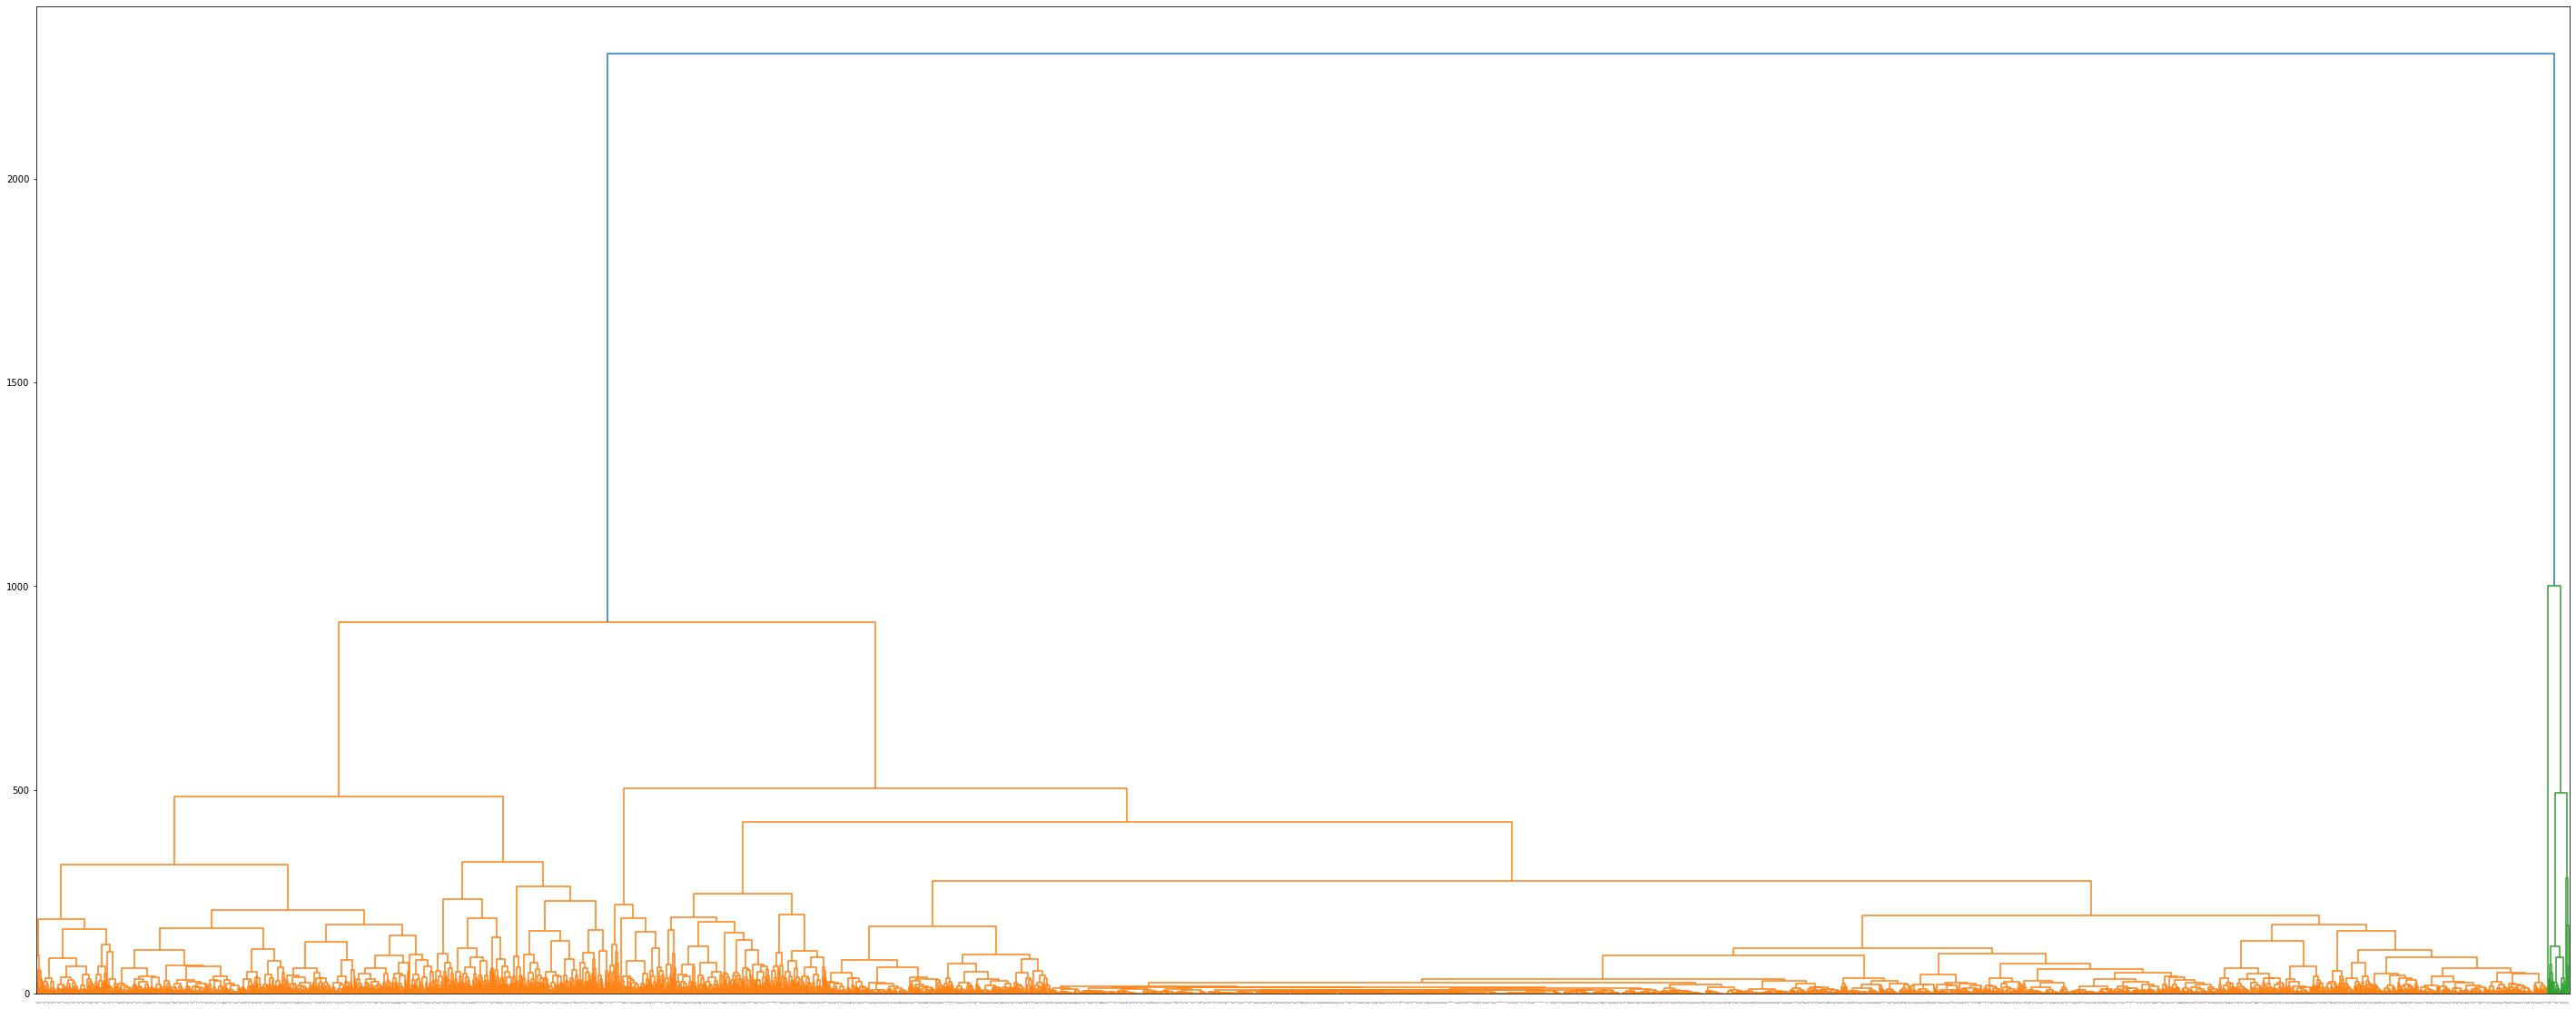

In [85]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


feature = train_x3

Z = linkage(feature,'ward')

plt.figure(figsize=(50,20))
dendrogram(Z,
           leaf_rotation=100,
           leaf_font_size=1,
)
plt.show()

[1 2 3]


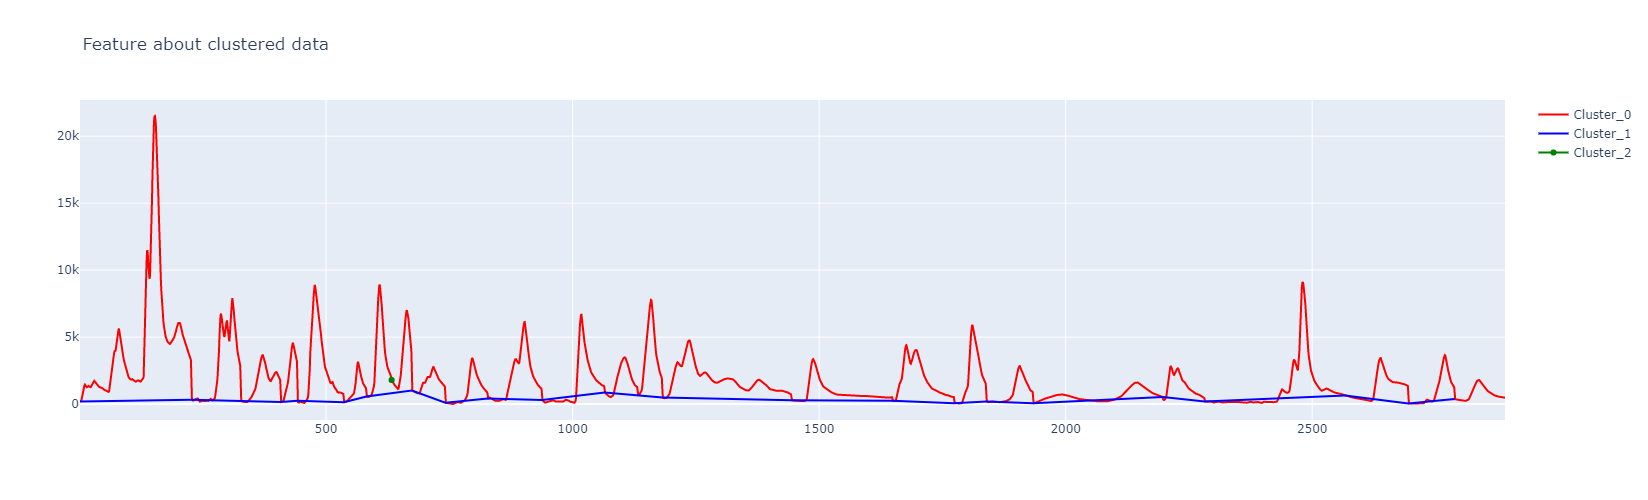

In [86]:
from scipy.cluster.hierarchy import fcluster

k=3
predict=fcluster(Z, k, criterion='maxclust')
print(np.unique(predict))
feature['cluster']=predict
train2 = feature

train2 = pd.concat([train2,train['유입량']], axis=1)

train_0 = train2[train2['cluster'] ==1]
train_1 = train2[train2['cluster']==2]
train_2 = train2[train2['cluster']==3]
#train_3 = train2[train2['cluster']==4]
#train_4 = train1[train1['cluster']==4]

cnt_srs_0 = train_0['유입량']
cnt_srs_1 = train_1['유입량']
cnt_srs_2 = train_2['유입량']
#cnt_srs_3 = train_3['유입량']
#cnt_srs_4 = train_4.groupby('date')['amount'].mean()

trace_0 = scatter_plot(cnt_srs_0, 'red', True ,'Cluster_0')
trace_1 = scatter_plot(cnt_srs_1, 'blue', True ,'Cluster_1')
trace_2 = scatter_plot(cnt_srs_2, 'green', True ,'Cluster_2')
#trace_3 = scatter_plot(cnt_srs_3, 'black', True ,'Cluster_3')
#trace_4 = scatter_plot(cnt_srs_4, 'indigo', True ,'Cluster_4')

layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='Feature about clustered data'
)

data = [trace_0,trace_1,trace_2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Clustering flood")

In [87]:
print(np.shape(train_0))
print(np.shape(train_1))
print(np.shape(train_2))

(2866, 45)
(24, 45)
(1, 45)


In [90]:
train_1

,홍수사상번호,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6,cluster,유입량
1,1.0,6.4000,7.0,7.0,7.0,8.0,2.54,122.56875,6.3000,7.0,7.0,7.0,8.0,2.54,122.541667,6.3000,7.0,7.0,7.0,8.0,2.54,122.550000,6.4000,7.0,7.0,8.0,8.0,2.54,122.675000,6.4000,7.0,7.0,8.0,8.0,2.54,122.660,6.4000,7.0,7.0,8.0,8.0,2.54,122.610,2,189.100000
227,2.0,0.0000,0.0,1.0,0.0,0.0,2.93,134.44375,0.0000,0.0,1.0,0.0,0.0,2.93,134.408333,0.0000,0.0,1.0,0.0,0.0,2.93,134.391667,0.5000,0.0,1.0,1.0,0.0,2.93,134.521429,0.5000,0.0,1.0,1.0,0.0,2.93,134.500,0.5000,0.0,1.0,1.0,0.0,2.93,134.475,2,323.993267
327,3.0,11.4000,6.0,6.0,0.0,1.0,2.64,129.36250,11.4000,6.0,6.0,0.0,1.0,2.64,129.383333,11.4000,6.0,6.0,0.0,1.0,2.64,129.383333,12.1000,6.0,6.0,12.0,1.0,2.64,129.335714,12.1000,6.0,6.0,12.0,1.0,2.64,129.328,11.9000,6.0,6.0,1.0,0.0,2.64,129.345,2,221.050131
408,4.0,0.0000,0.0,0.0,0.0,0.0,2.53,140.34375,0.0000,0.0,0.0,0.0,0.0,2.53,140.300000,0.0000,0.0,0.0,0.0,0.0,2.53,140.283333,0.6000,0.0,0.0,1.0,3.0,2.53,140.439286,0.6000,0.0,0.0,1.0,3.0,2.53,140.408,0.6000,0.0,0.0,1.0,3.0,2.53,140.380,2,161.803002
442,5.0,1.8310,0.0,0.0,1.0,0.0,2.46,121.50000,1.7315,0.0,0.0,1.0,0.0,2.46,121.500000,1.7315,0.0,0.0,1.0,0.0,2.46,121.500000,1.7428,0.0,0.0,3.0,0.0,2.46,121.500000,1.6273,0.0,0.0,3.0,0.0,2.46,121.500,1.6273,0.0,0.0,2.0,0.0,2.46,121.500,2,251.514771
536,6.0,12.0384,9.0,15.0,13.0,13.0,1.80,120.00000,12.0384,9.0,15.0,6.0,13.0,1.80,120.000000,12.0384,9.0,15.0,3.0,13.0,1.80,120.000000,12.0646,9.0,15.0,15.0,12.0,1.80,120.000000,11.9392,9.0,15.0,15.0,12.0,1.80,120.000,11.9048,9.0,15.0,1.0,6.0,1.80,120.000,2,127.124154
582,7.0,87.0887,120.0,61.0,0.0,0.0,3.68,123.08125,80.7006,120.0,52.0,0.0,0.0,3.68,123.116667,80.7006,120.0,8.0,0.0,0.0,3.68,123.125000,71.9056,120.0,8.0,22.0,0.0,3.68,122.907143,60.9238,120.0,8.0,22.0,0.0,3.68,122.968,13.7890,120.0,15.0,0.0,0.0,3.68,123.035,2,568.923863
674,9.0,0.1493,0.0,1.0,0.0,0.0,3.78,134.44375,0.1493,0.0,1.0,0.0,0.0,3.78,134.383333,0.1493,0.0,1.0,0.0,0.0,3.78,134.341667,0.2247,0.0,1.0,0.0,0.0,3.78,134.560714,0.2057,0.0,1.0,0.0,0.0,3.78,134.532,0.2057,0.0,1.0,0.0,0.0,3.78,134.500,2,1011.388849
742,10.0,0.4451,7.0,0.0,0.0,0.0,1.91,127.76250,0.4451,7.0,0.0,0.0,0.0,1.91,127.750000,0.4451,7.0,0.0,0.0,0.0,1.91,127.733333,0.4536,7.0,0.0,0.0,0.0,1.91,127.771429,0.3114,7.0,0.0,0.0,0.0,1.91,127.768,0.0237,7.0,0.0,0.0,0.0,1.91,127.770,2,95.413282
828,11.0,1.2958,0.0,1.0,0.0,0.0,3.19,133.86875,1.2835,0.0,1.0,0.0,0.0,3.19,133.916667,1.2835,0.0,1.0,0.0,0.0,3.19,133.925000,1.2413,0.0,1.0,0.0,0.0,3.19,133.817857,1.0345,0.0,1.0,0.0,0.0,3.19,133.832,0.2920,0.0,1.0,0.0,0.0,3.19,133.840,2,407.973983


In [92]:
train.iloc[631:634,:]

,홍수사상번호,연,월,일,시간,유입량,유역평균강수_1,강우(A지역)_1,강우(B지역)_1,강우(C지역)_1,강우(D지역)_1,수위(E지역)_1,수위(D지역)_1,유역평균강수_2,강우(A지역)_2,강우(B지역)_2,강우(C지역)_2,강우(D지역)_2,수위(E지역)_2,수위(D지역)_2,유역평균강수_3,강우(A지역)_3,강우(B지역)_3,강우(C지역)_3,강우(D지역)_3,수위(E지역)_3,수위(D지역)_3,유역평균강수_4,강우(A지역)_4,강우(B지역)_4,강우(C지역)_4,강우(D지역)_4,수위(E지역)_4,수위(D지역)_4,유역평균강수_5,강우(A지역)_5,강우(B지역)_5,강우(C지역)_5,강우(D지역)_5,수위(E지역)_5,수위(D지역)_5,유역평균강수_6,강우(A지역)_6,강우(B지역)_6,강우(C지역)_6,강우(D지역)_6,수위(E지역)_6,수위(D지역)_6
632,7.0,2009.0,7.0,13.0,21.0,2045.886470,143.3948,212.0,126.0,112.0,123.0,5.90,130.45625,143.3948,212.0,126.0,97.0,123.0,5.90,130.825000,143.3948,212.0,126.0,87.0,122.0,5.90,130.933333,143.3948,212.0,126.0,117.0,122.0,5.90,128.803571,143.3948,212.0,126.0,117.0,122.0,5.90,129.340,143.3402,212.0,126.0,77.0,99.0,5.90,129.930
633,8.0,2009.0,7.0,13.0,24.0,1793.964445,143.3948,212.0,126.0,87.0,115.0,5.55,130.85000,143.3948,212.0,126.0,78.0,115.0,5.55,131.100000,143.3948,212.0,125.0,77.0,99.0,5.55,131.158333,143.4697,212.0,125.0,116.0,84.0,5.55,129.550000,143.4697,212.0,125.0,116.0,84.0,5.55,130.020,142.8932,212.0,126.0,68.0,62.0,5.55,130.485
634,8.0,2009.0,7.0,14.0,1.0,1717.112856,143.3948,212.0,126.0,83.0,99.0,5.44,130.94375,143.4697,212.0,126.0,77.0,99.0,5.44,131.158333,143.4697,212.0,124.0,76.0,84.0,5.44,131.208333,143.8654,213.0,124.0,116.0,76.0,5.44,129.767857,143.8654,213.0,124.0,116.0,76.0,5.44,130.204,143.0173,213.0,125.0,67.0,53.0,5.44,130.625


In [93]:
from xgboost import XGBRegressor
xgb1 = XGBRegressor(n_estimators=10000000, n_jobs=-1)
xgb1.fit(train_x3, train_y, 
         eval_set=[(train_x3, train_y)],
         eval_metric = 'rmse',
         early_stopping_rounds=100,
         verbose=100)

[0]	validation_0-rmse:2109.19824
[100]	validation_0-rmse:122.15116
[200]	validation_0-rmse:44.90079
[300]	validation_0-rmse:19.48672
[400]	validation_0-rmse:9.44176
[500]	validation_0-rmse:5.01084
[600]	validation_0-rmse:3.00605
[700]	validation_0-rmse:1.98622
[800]	validation_0-rmse:1.32406
[900]	validation_0-rmse:0.94256
[1000]	validation_0-rmse:0.74257
[1100]	validation_0-rmse:0.64025
[1200]	validation_0-rmse:0.56780
[1300]	validation_0-rmse:0.53425
[1400]	validation_0-rmse:0.51558
[1500]	validation_0-rmse:0.50326
[1600]	validation_0-rmse:0.49658
[1700]	validation_0-rmse:0.49372
[1800]	validation_0-rmse:0.49189
[1900]	validation_0-rmse:0.49093
[2000]	validation_0-rmse:0.49055
[2100]	validation_0-rmse:0.49034
[2200]	validation_0-rmse:0.49024
[2300]	validation_0-rmse:0.49019
[2400]	validation_0-rmse:0.49017
[2474]	validation_0-rmse:0.49017


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000000, n_jobs=-1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [95]:
pred_y2 = xgb1.predict(train_x3)

In [96]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(train_y, pred_y2)
np.sqrt(MSE)

0.49016831717727616

In [103]:
test.월.unique()

array([7.])

In [110]:
train[train.홍수사상번호 == 25]['일'].unique()

array([14., 15., 16., 17., 18.])